In [111]:
import pandas as pd
import numpy as np
import spacy
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from typing import Union
from sklearn.metrics import confusion_matrix,recall_score,f1_score,precision_score
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Loading Text(Tweets)

In [2]:
df = pd.read_csv(r'E:\Ragul\archive/FinalBalancedDataset.csv')

In [3]:
len(df)

56745

In [4]:
def drop(DataFrame : object, columns : Union[str,list]):
    '''
    DataFrame : object
    column : str | list
    this function will drop the "columns" permanently from the "DataFrame"
    '''
    try:
        DataFrame.drop(columns,axis=1,inplace=True)
        print(f'Succefully Dropped "{columns}" columns')
    except Exception as e:
        print(e)

In [5]:
df.head()

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [6]:
# dropping Unnamed: 0, this column has no use for our analysis
drop(df,'Unnamed: 0')

Succefully Dropped "Unnamed: 0" columns


In [7]:
df.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


# 2:- Preprocessing

### Removing punctuations and digits from the string

In [8]:
import string

In [9]:
string.punctuation + string.digits

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~0123456789'

In [10]:
string.digits

'0123456789'

In [11]:
def remove_punc_dig(text : str):
    '''
    text : str 
    This function will remove all the punctuations and digits from the "text"
    '''
    to_remove = string.punctuation + string.digits
    cur_text = ""
    for i in range(len(text)):
        if text[i] in to_remove:
            cur_text += " "
        else:
            cur_text += text[i].lower()
    cur_text = " ".join(cur_text.split())
    return cur_text

In [12]:
# testing remove_punc_dig
a = remove_punc_dig('@ahsa JJAS BL;khja shjsj aodz iw 1  akea1 sjj21 dsjsj32 ajea `123 ')

In [13]:
# working as expected
a

'ahsa jjas bl khja shjsj aodz iw akea sjj dsjsj ajea'

In [14]:
# applying remove_punc_dig on dataframe df and removing all the punctuations and numbers from the tweets
df['cur_tweet'] = df['tweet'].apply(lambda x:remove_punc_dig(x))

In [15]:
df.head()

,Toxicity,tweet,cur_tweet
0,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so ...
1,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can t use c...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in urð...
4,0,factsguide: society now #motivation,factsguide society now motivation


In [16]:
# we don't need tweet column now so dropping the column
drop(df,'tweet')

Succefully Dropped "tweet" columns


In [17]:
df.head()

,Toxicity,cur_tweet
0,0,user when a father is dysfunctional and is so ...
1,0,user user thanks for lyft credit i can t use c...
2,0,bihday your majesty
3,0,model i love u take with u all the time in urð...
4,0,factsguide society now motivation


### Applying lemmatization on cur_tweet

#### removing stop words before applying lemmatization

In [18]:
# removing stop words like I,my,myself,etc
from spacy.lang.en.stop_words import STOP_WORDS

In [19]:
# !python -m spacy download en_core_web_sm==3.3.0
# !pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
# !pip install spacy==3.3.0
# !pip install spacy-legacy==3.0.9
# !pip install spacy-loggers==1.0.2

[!] Skipping model package dependencies and setting `--no-deps`. You don't seem
to have the spaCy package itself installed (maybe because you've built from
source?), so installing the model dependencies would cause spaCy to be
downloaded, which probably isn't what you want. If the model package has other
dependencies, you'll have to install them manually.

[x] No compatible model found for 'en_core_web_sm==3.3.0' (spaCy v2.3.9).



In [20]:
# we will use spacy lemmatizer API to perform lemmatization on cur_tweet and removing stop words
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

D:\Program files\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.9). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [21]:
def remove_stop_words(text: str):
    '''
    text : str
    This function will remove stop words like I,my,myself etc
    '''
    filtered_sentence = []
    for word in text.split(' '):
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word) 
    return " ".join(filtered_sentence)

In [22]:
# as we can see in below output the remove_stop_words function is successfully removing the stop words
remove_stop_words('i am zidane i my self myself sunesara')

'zidane self sunesara'

In [23]:
#applying remove_stop_words function on cur_tweets of dataframe df
df['filtered_cur_tweet'] = df['cur_tweet'].apply(lambda x : remove_stop_words(x))

In [24]:
df.head()

,Toxicity,cur_tweet,filtered_cur_tweet
0,0,user when a father is dysfunctional and is so ...,user father dysfunctional selfish drags kids d...
1,0,user user thanks for lyft credit i can t use c...,user user thanks lyft credit t use cause don t...
2,0,bihday your majesty,bihday majesty
3,0,model i love u take with u all the time in urð...,model love u u time urð± ðððð ð...
4,0,factsguide society now motivation,factsguide society motivation


In [25]:
# we don't need the cur_tweet now so dropping the cur_tweet column
drop(df,'cur_tweet')

Succefully Dropped "cur_tweet" columns


In [26]:
# testing how to do lematization so we can implement on our tweet data frame
doc = nlp('did displaying words')
for token in doc:
    print(token.lemma_)

do
display
word


In [27]:
def lemmatizer(text : str):
    '''
    text : str
    Applying lemmatization for all words of "text"
    '''
    return " ".join([token.lemma_ for token in nlp(text)])

In [28]:
# testing the user defined function lemmatizer function
print(lemmatizer('did displaying words'))

do display word


In [29]:
#applying lemmatizer function on cur_tweets of dataframe df
df['lemma_cur_tweet'] = df['filtered_cur_tweet'].apply(lambda x : lemmatizer(x))

In [30]:
df.head()

,Toxicity,filtered_cur_tweet,lemma_cur_tweet
0,0,user father dysfunctional selfish drags kids d...,user father dysfunctional selfish drag kid dys...
1,0,user user thanks lyft credit t use cause don t...,user user thanks lyft credit t use cause don t...
2,0,bihday majesty,bihday majesty
3,0,model love u u time urð± ðððð ð...,model love u u time urð± ðððð ð...
4,0,factsguide society motivation,factsguide society motivation


In [31]:
# droping filtered_cur_tweet column since we don't need it any more
drop(df,'filtered_cur_tweet')

Succefully Dropped "filtered_cur_tweet" columns


# 3:- glove dictionary:-


In [32]:
def load_embeddings(file):
    f = open(file,'r')
    gloveModel = dict()
    for line in f:
        splitLines = line.split()
        word = splitLines[0]
        wordEmbedding = np.array([float(value) for value in splitLines[1:]])
        gloveModel[word]=wordEmbedding        
    
    return gloveModel

In [33]:
import numpy as np

def load_embeddings(embeddings_file):
    word_to_vector = {}
    with open(embeddings_file, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.strip().split()
            word = values[0]
            vector = np.array([float(val) for val in values[1:]])
            word_to_vector[word] = vector
    return word_to_vector
gloveModelDict = load_embeddings('glove.6B.100d.txt')

In [34]:
# X is input feature and Y is output feature
X = df.loc[:,'lemma_cur_tweet']
Y = df['Toxicity']

In [35]:
# splitting the data in 80:20 ratio
X_train, X_test,y_train, y_test = train_test_split(X,Y ,
                                   random_state=104, 
                                   test_size=0.20, 
                                   shuffle=True)

## Text Transformation

In [36]:
def text_transformer_glove_sum(text):
    sum_of_words_vector = np.zeros((100,))
    for word in text.split():
        if word in gloveModelDict:
            sum_of_words_vector += gloveModelDict[word]
    return sum_of_words_vector


In [37]:
text_transformer_glove_sum('zidane is the great')

array([ 5.2978000e-01,  7.0685000e-01,  2.6544400e+00, -1.3640800e+00,
        4.1474200e-01,  8.6550300e-01, -8.4722300e-01,  7.6839000e-01,
       -1.5891140e+00, -9.1971100e-01,  2.0253000e-01, -3.1774400e-01,
        1.8574000e-01, -8.5364000e-01,  3.1132100e-01, -5.7169000e-01,
        1.2429370e+00,  1.0140100e-01, -1.1025270e+00,  1.2047500e+00,
       -5.6045900e-01,  1.0755700e+00, -6.3152000e-01, -7.4907900e-01,
        2.6940600e+00, -4.4644000e-01, -3.5134100e-01, -1.1565630e+00,
        5.2732000e-01, -1.2498460e+00, -1.2034520e+00,  1.3525930e+00,
       -4.1034000e-01, -5.5610000e-02,  9.1862000e-01,  5.1793050e-01,
        8.2700000e-03,  2.1033700e+00, -9.9767000e-01, -3.3349800e-01,
       -1.0493000e+00,  1.1864600e-01,  2.4373200e+00, -1.9077300e+00,
        1.5977100e+00,  1.7377600e+00,  2.5439800e+00, -1.2134200e+00,
       -4.8710000e-01, -2.0860200e+00, -4.2734000e-02,  5.4960000e-01,
        7.6465000e-01,  3.6563800e+00, -1.7374350e+00, -9.6876700e+00,
      

In [38]:
cols = ['X'+str(i) for i in range(1,301)]

In [39]:
def two_dimension(array):
    two_dimension_array = []
    for i in array:
        two_dimension_array.append(i)
    return two_dimension_array
    


## Transforming Training Set

In [40]:
sentence_vectors_train = X_train.apply(lambda x : text_transformer_glove_sum(x))
sentence_vectors_train = sentence_vectors_train.values
sentence_vectors_train = two_dimension(sentence_vectors_train)

In [41]:
cols = ['feature_' + str(i) for i in range(100)]

X_train_transformed = pd.DataFrame(data=sentence_vectors_train, columns=cols)

In [42]:
X_train_transformed.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
0,0.504473,0.452851,5.783763,-0.796393,0.525530,-2.152283,-0.098291,1.588089,-2.986999,0.677951,...,0.243610,0.527691,-2.611250,-3.817807,-5.342406,4.057466,0.744683,0.820155,6.676350,0.121010
1,-0.269108,0.872100,-0.635698,-0.010710,0.208860,-0.432780,-0.431062,1.015900,-0.549230,-1.405180,...,-2.069030,0.968048,0.131398,0.366980,-0.615970,-0.339400,1.168110,-0.536120,0.746694,-0.311500
2,2.180390,4.200566,4.240440,-4.243948,-6.026972,3.886738,-3.077450,4.241883,0.442850,-0.293621,...,2.452280,0.035048,2.499409,0.934053,-3.227278,-0.159450,-1.249402,-1.531303,3.104590,4.786490
3,-1.853526,0.578419,1.815197,-3.691011,-2.911823,1.345768,-0.154775,1.027093,0.254129,0.204193,...,-2.498746,1.170171,-1.618080,0.469582,0.768633,-3.515106,0.136530,-0.186918,3.538724,1.097843
4,-1.256724,2.622179,0.710310,-2.308607,-0.852225,0.303390,-2.332856,1.261557,-0.441553,0.382689,...,-0.782934,2.277520,0.351553,1.145030,-0.033996,-0.771728,-2.657124,-2.808869,1.616835,1.091952


## Transforming Testing Set

In [43]:
sentence_vectors_test = X_test.apply(lambda x : text_transformer_glove_sum(x))
sentence_vectors_test = sentence_vectors_test.values
sentence_vectors_test = two_dimension(sentence_vectors_test)

In [44]:
X_test_transformed = pd.DataFrame(data = sentence_vectors_test,columns = cols)

## Applying Logistic Regression

In [186]:
# training logistic Regression algorithm on Train Data
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_train_transformed,y_train)

In [187]:
# predicting target feature for test data
test_pred = clf.predict(X_test_transformed)
accuracy = accuracy_score(y_test, test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8851881223015243


# 6:- Creating Confusion Matrix to check how good our model is working

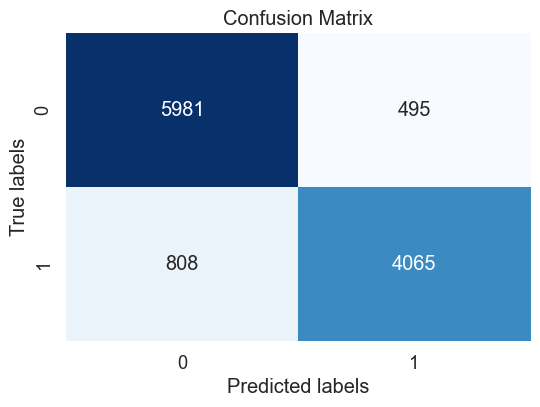

In [151]:
cm = confusion_matrix(y_test, test_pred)

# Create a heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [152]:
# recall score:-
recall_score(y_test,test_pred)

0.8341883849784527

In [153]:
#precision_score:-
precision_score(y_test,test_pred)

0.8914473684210527

In [154]:
# f1 score
f1_score(y_test,test_pred)

0.8618679105268737

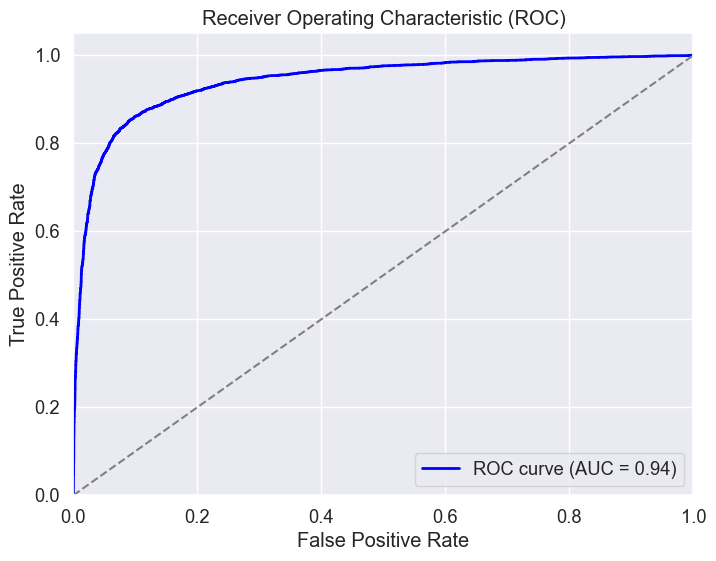

In [155]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

# Assuming you have clf, X_test_transformed, and y_test
# clf is your logistic regression model

# Predict probabilities for the positive class
y_prob = clf.predict_proba(X_test_transformed)[:, 1]

# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# Applying KNN

In [189]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have X_train_transformed and y_train from your previous steps

# Create a KNN classifier
k = 5  # You can adjust the number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn_classifier.fit(X_train_transformed, y_train)

# Predict using the test data
test_pred = knn_classifier.predict(X_test_transformed)
accuracy = accuracy_score(y_test, test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8849237818309983


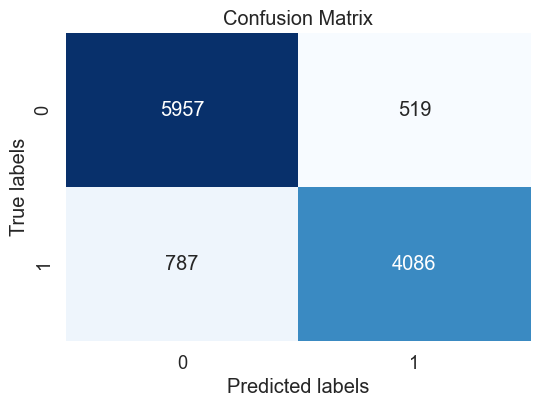

In [160]:
cm = confusion_matrix(y_test, test_pred)

# Create a heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [161]:
recall_score(y_test,test_pred)

0.8384978452698543

In [162]:
precision_score(y_test,test_pred)

0.8872964169381108

In [163]:
f1_score(y_test,test_pred)

0.8622072167123865

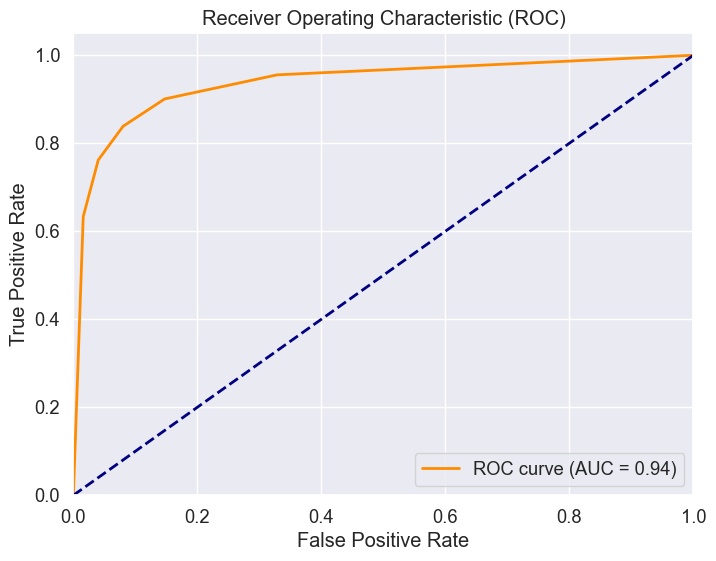

In [164]:
y_pred_prob = knn_classifier.predict_proba(X_test_transformed)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Applying Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier instance
clf = RandomForestClassifier(random_state=0, n_estimators=100)

# Fit the classifier to your transformed training data
clf.fit(X_train_transformed, y_train)

# Predict on the transformed test data
test_pred = clf.predict(X_test_transformed)
accuracy = accuracy_score(y_test, test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8791082914794255


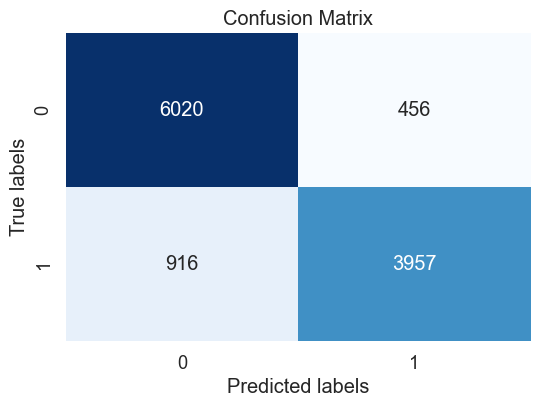

In [166]:
cm = confusion_matrix(y_test, test_pred)

# Create a heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [167]:
recall_score(y_test,test_pred)

0.8120254463369587

In [168]:
precision_score(y_test,test_pred)

0.8966689326988443

In [169]:
f1_score(y_test,test_pred)

0.8522506999784621

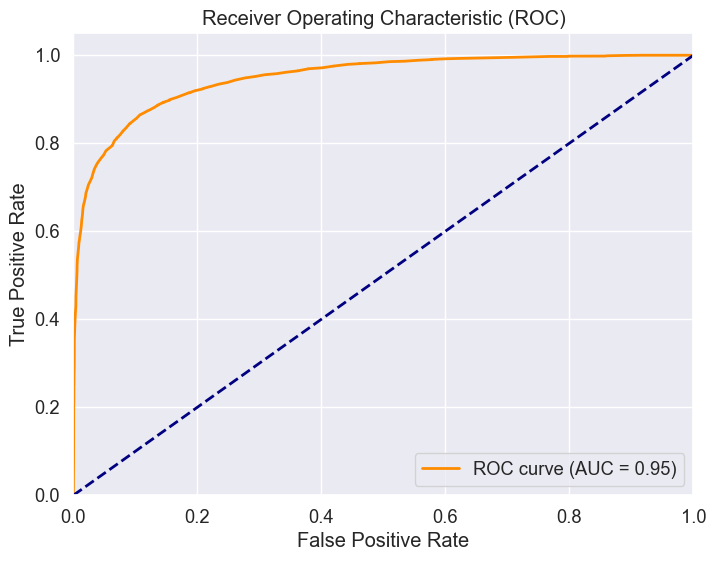

In [170]:
y_pred_prob = clf.predict_proba(X_test_transformed)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Decision Tree

In [133]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_transformed, y_train)

# Predict using the trained model
test_pred = clf.predict(X_test_transformed)
accuracy = accuracy_score(y_test, test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8013921931447705


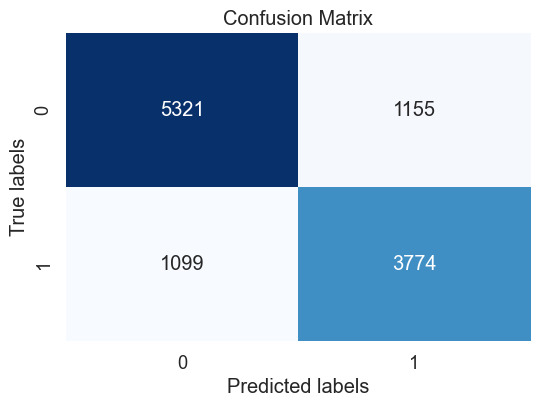

In [134]:
cm = confusion_matrix(y_test, test_pred)

# Create a heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [135]:
recall_score(y_test,test_pred)

0.7744715780833162

In [136]:
precision_score(y_test,test_pred)

0.7656725502130249

In [137]:
f1_score(y_test,test_pred)

0.7700469291981228

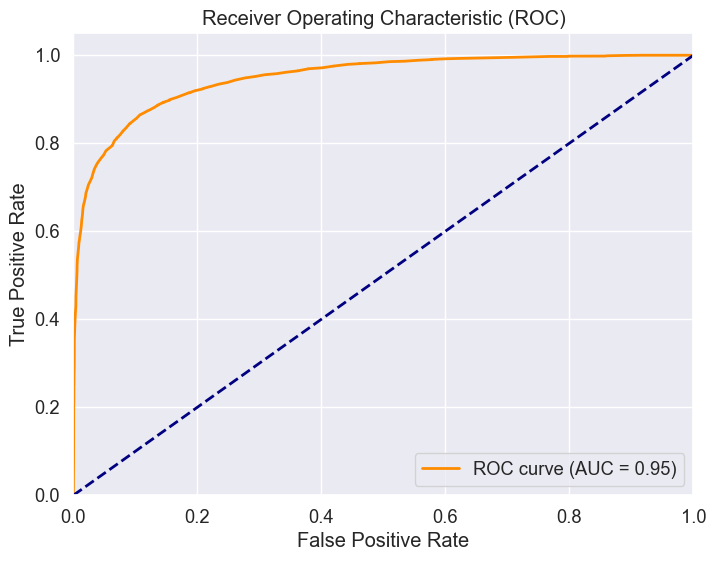

In [171]:
y_pred_prob = clf.predict_proba(X_test_transformed)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# SVM

In [174]:
from sklearn.svm import SVC

# Create an SVM classifier instance
clf = SVC(random_state=0)

# Fit the classifier on the transformed training data
clf.fit(X_train_transformed, y_train)

# Predict using the SVM classifier
test_pred = clf.predict(X_test_transformed)
accuracy = accuracy_score(y_test, test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9070402678650101


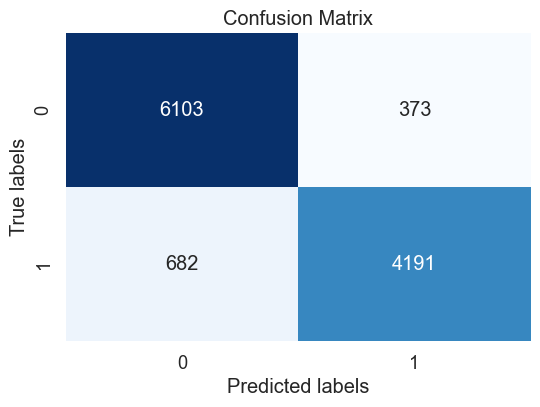

In [175]:
cm = confusion_matrix(y_test, test_pred)

# Create a heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [176]:
recall_score(y_test,test_pred)

0.8600451467268623

In [177]:
precision_score(y_test,test_pred)

0.9182734443470639

In [178]:
f1_score(y_test,test_pred)

0.8882059976687505

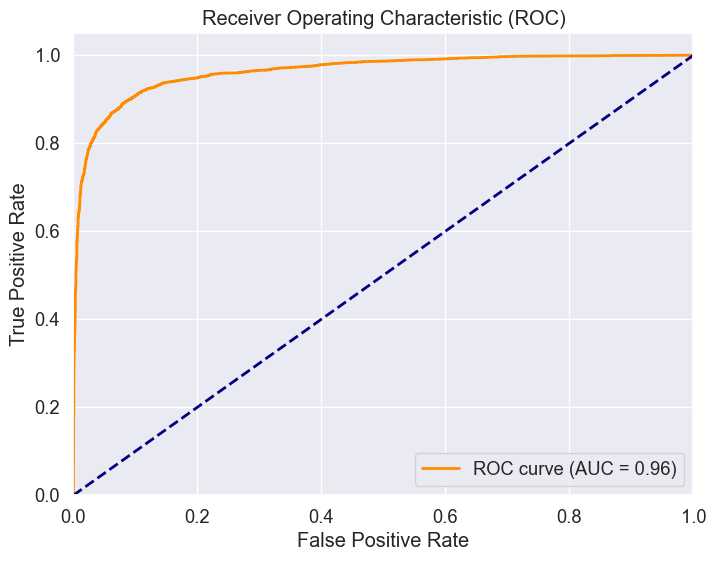

In [179]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
y_pred_scores = clf.decision_function(X_test_transformed)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_scores)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Naive Bayes

In [180]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming you have X_train_transformed and y_train from previous steps
# Also assuming you have X_test_transformed and y_test for testing

# Create a Multinomial Naive Bayes classifier
clf = GaussianNB()

# Fit the classifier on the training data
clf.fit(X_train_transformed, y_train)

# Make predictions on the test data
test_pred = clf.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, test_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8424530795664816


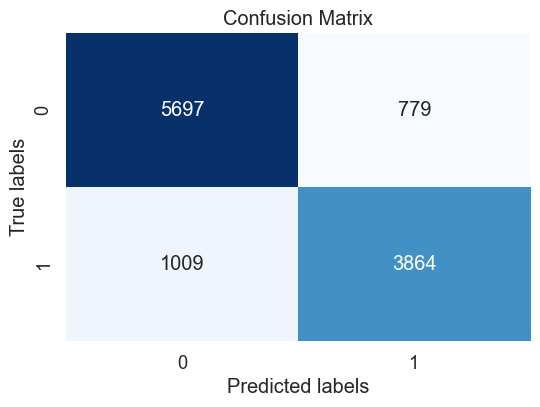

In [181]:
cm = confusion_matrix(y_test, test_pred)

# Create a heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [182]:
recall_score(y_test,test_pred)

0.7929406936178945

In [183]:
precision_score(y_test,test_pred)

0.8322205470600904

In [184]:
f1_score(y_test,test_pred)

0.8121059268600251

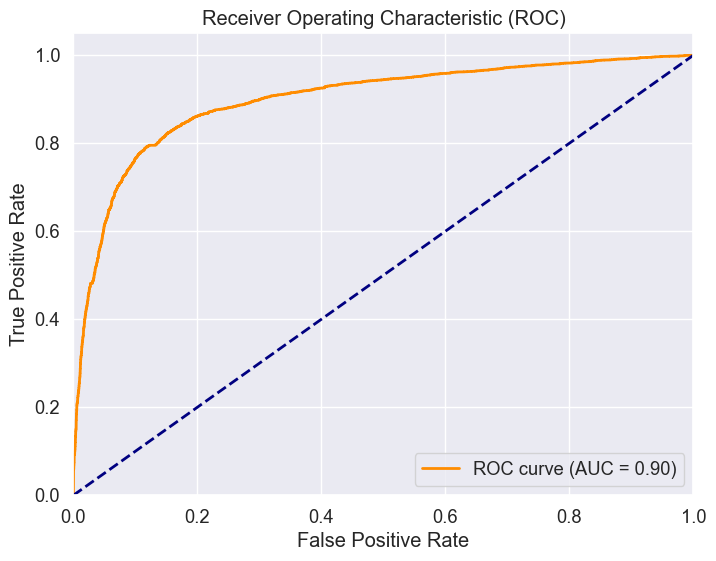

In [185]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming you have X_train_transformed and y_train from previous steps
# Also assuming you have X_test_transformed and y_test for testing

# Create a Multinomial Naive Bayes classifier
clf = GaussianNB()

# Fit the classifier on the training data
clf.fit(X_train_transformed, y_train)

# Get probability estimates for positive class
y_pred_prob = clf.predict_proba(X_test_transformed)[:, 1]

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
